<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
              color:white;">
                   <center> Author: @ammarnassanalhajali</center> <br>
                   <center> Original Notebook: <a href="https://www.kaggle.com/ammarnassanalhajali/brain-tumor-3d-training" style="color:gold" >Notebook</a> </center> <br>
</p>               
</div>

<center><h1>In this Notebook we will be going through and annotating @ammarnassanalhajali 's "🧠Brain Tumor 3D [Training]" Notebook<br> ( <i>please see the original work</i> )</center>

### The Goal: provide clear analysis as to what the logic in each function is doing such that anyone new to ml or python can replicate a given concept with their own logic after some critical thought

#### Last Couple of Remarks before the Annotations: I am currently working through annotating the model section of this notebook as well as a few more preprocessing notebooks. Thanks for Reading!

#### (8/25 update) I apologize for the late annotations on this, school started up and things got busy

#### (8/25 update) see author's continuation of this nb w/ inference @ https://www.kaggle.com/ammarnassanalhajali/brain-tumor-3d-inference/data

#### **<center>Imports</center>**

In [ ]:
import os
#for file management
import json
#for standardized data storage
import glob
#for precise file selection(low verbosity)
import random
#random amount generator
import collections
#has premade datastructure objects that can be implemented
import time
#return the time in seconds since the epoch as a floating point number. A good way to watch your training progress quantitatively
import re
#import regular expression matching operations. alows for facilitated use of string comparison. Docs:https://docs.python.org/3/library/re.html
import math
#provides mathematical functions established within the c-standard. gives ceil, factorial, etc. Docs:https://docs.python.org/3/library/math.html
import numpy as np
#linear algebra
import pandas as pd
#succinct array and data handling
import cv2
#image data handler

import matplotlib.pyplot as plt
#data visualization library
import seaborn as sns
#data visualization library

import pydicom
#c based dicom modulation tool
from pydicom.pixel_data_handlers.util import apply_voi_lut
#pixel handler that uses voi_lut to grab pixel data from within the frame of a window

from random import shuffle
#random library allows for generation of pseudo-random number and ways to use os to get as random as feasible. shuffle is method provided that will use a random function to effectively randomize the order of an array
from sklearn import model_selection as sk_model_selection
#the sklearn library provides the model_slection library and we set the name for this notebook to be 'sk_model_selection'.  it wraps the input validation data(X and true for training purposes ) and splits it according 
    #to a random function that can thereby be set to have a seed that will assure reproducible results accross training sessions. Stratification(approximately even proportions of 0 and 1 data) is the default
    #Docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from tensorflow import keras
#the notorious tf library provises the keras framework that can be used to interface with artifical neural networks via methods and pre-built objects from the libary
    #Docs: https://faroit.com/keras-docs/1.2.0/
from tensorflow.keras import layers
#from the keras library import layers: "A layer encapsulates both a state (the layer's "weights") and a transformation from inputs to outputs (a "call", the layer's forward pass).". source: https://www.tensorflow.org/guide/keras/custom_layers_and_models
import tensorflow as tf
#importing the tensor flow library as tf

#### **<center>Annotated</center>**

In [ ]:
data_directory = '../input/rsna-miccai-brain-tumor-radiogenomic-classification'
#set data_directory variable to file location of the main dir
pytorch3dpath = "../input/efficientnetpyttorch3d/EfficientNet-PyTorch-3D"
#here we are loading a pretrained model from the EfficientNet-PyTorch-3D library

**I went ahead and grabbed the model details and will leave it in the next code block for those interested:**
> I can, and likely will have to come back and review this in more detail and annotate some more when I get to my model collection period for ensembling this competition(will get back with this)

In [ ]:
# import torch
# from torch import nn
# from torch.nn import functional as F

# from .utils import (
#     round_filters,
#     round_repeats,
#     drop_connect,
#     get_same_padding_conv3d,
#     get_model_params,
#     efficientnet_params,
#     Swish,
#     MemoryEfficientSwish,
# )

# class MBConvBlock3D(nn.Module):
#     """
#     Mobile Inverted Residual Bottleneck Block

#     Args:
#         block_args (namedtuple): BlockArgs, see above
#         global_params (namedtuple): GlobalParam, see above

#     Attributes:
#         has_se (bool): Whether the block contains a Squeeze and Excitation layer.
#     """

#     def __init__(self, block_args, global_params):
#         super().__init__()
#         self._block_args = block_args
#         self._bn_mom = 1 - global_params.batch_norm_momentum
#         self._bn_eps = global_params.batch_norm_epsilon
#         self.has_se = (self._block_args.se_ratio is not None) and (0 < self._block_args.se_ratio <= 1)
#         self.id_skip = block_args.id_skip  # skip connection and drop connect

#         # Get static or dynamic convolution depending on image size
#         Conv3d = get_same_padding_conv3d(image_size=global_params.image_size)

#         # Expansion phase
#         inp = self._block_args.input_filters  # number of input channels
#         oup = self._block_args.input_filters * self._block_args.expand_ratio  # number of output channels
#         if self._block_args.expand_ratio != 1:
#             self._expand_conv = Conv3d(in_channels=inp, out_channels=oup, kernel_size=1, bias=False)
#             self._bn0 = nn.BatchNorm3d(num_features=oup, momentum=self._bn_mom, eps=self._bn_eps)

#         # Depthwise convolution phase
#         k = self._block_args.kernel_size
#         s = self._block_args.stride
#         self._depthwise_conv = Conv3d(
#             in_channels=oup, out_channels=oup, groups=oup,  # groups makes it depthwise
#             kernel_size=k, stride=s, bias=False)
#         self._bn1 = nn.BatchNorm3d(num_features=oup, momentum=self._bn_mom, eps=self._bn_eps)

#         # Squeeze and Excitation layer, if desired
#         if self.has_se:
#             num_squeezed_channels = max(1, int(self._block_args.input_filters * self._block_args.se_ratio))
#             self._se_reduce = Conv3d(in_channels=oup, out_channels=num_squeezed_channels, kernel_size=1)
#             self._se_expand = Conv3d(in_channels=num_squeezed_channels, out_channels=oup, kernel_size=1)

#         # Output phase
#         final_oup = self._block_args.output_filters
#         self._project_conv = Conv3d(in_channels=oup, out_channels=final_oup, kernel_size=1, bias=False)
#         self._bn2 = nn.BatchNorm3d(num_features=final_oup, momentum=self._bn_mom, eps=self._bn_eps)
#         self._swish = MemoryEfficientSwish()

#     def forward(self, inputs, drop_connect_rate=None):
#         """
#         :param inputs: input tensor
#         :param drop_connect_rate: drop connect rate (float, between 0 and 1)
#         :return: output of block
#         """

#         # Expansion and Depthwise Convolution
#         x = inputs
#         if self._block_args.expand_ratio != 1:
#             x = self._swish(self._bn0(self._expand_conv(inputs)))
#         x = self._swish(self._bn1(self._depthwise_conv(x)))

#         # Squeeze and Excitation
#         if self.has_se:
#             x_squeezed = F.adaptive_avg_pool3d(x, 1)
#             x_squeezed = self._se_expand(self._swish(self._se_reduce(x_squeezed)))
#             x = torch.sigmoid(x_squeezed) * x

#         x = self._bn2(self._project_conv(x))

#         # Skip connection and drop connect
#         input_filters, output_filters = self._block_args.input_filters, self._block_args.output_filters
#         if self.id_skip and self._block_args.stride == 1 and input_filters == output_filters:
#             if drop_connect_rate:
#                 x = drop_connect(x, p=drop_connect_rate, training=self.training)
#             x = x + inputs  # skip connection
#         return x

#     def set_swish(self, memory_efficient=True):
#         """Sets swish function as memory efficient (for training) or standard (for export)"""
#         self._swish = MemoryEfficientSwish() if memory_efficient else Swish()


# class EfficientNet3D(nn.Module):
#     """
#     An EfficientNet model. Most easily loaded with the .from_name or .from_pretrained methods

#     Args:
#         blocks_args (list): A list of BlockArgs to construct blocks
#         global_params (namedtuple): A set of GlobalParams shared between blocks

#     Example:
#         model = EfficientNet3D.from_pretrained('efficientnet-b0')

#     """

#     def __init__(self, blocks_args=None, global_params=None, in_channels=3):
#         super().__init__()
#         assert isinstance(blocks_args, list), 'blocks_args should be a list'
#         assert len(blocks_args) > 0, 'block args must be greater than 0'
#         self._global_params = global_params
#         self._blocks_args = blocks_args

#         # Get static or dynamic convolution depending on image size
#         Conv3d = get_same_padding_conv3d(image_size=global_params.image_size)

#         # Batch norm parameters
#         bn_mom = 1 - self._global_params.batch_norm_momentum
#         bn_eps = self._global_params.batch_norm_epsilon

#         # Stem
#         out_channels = round_filters(32, self._global_params)  # number of output channels
#         self._conv_stem = Conv3d(in_channels, out_channels, kernel_size=3, stride=2, bias=False)
#         self._bn0 = nn.BatchNorm3d(num_features=out_channels, momentum=bn_mom, eps=bn_eps)

#         # Build blocks
#         self._blocks = nn.ModuleList([])
#         for block_args in self._blocks_args:

#             # Update block input and output filters based on depth multiplier.
#             block_args = block_args._replace(
#                 input_filters=round_filters(block_args.input_filters, self._global_params),
#                 output_filters=round_filters(block_args.output_filters, self._global_params),
#                 num_repeat=round_repeats(block_args.num_repeat, self._global_params)
#             )

#             # The first block needs to take care of stride and filter size increase.
#             self._blocks.append(MBConvBlock3D(block_args, self._global_params))
#             if block_args.num_repeat > 1:
#                 block_args = block_args._replace(input_filters=block_args.output_filters, stride=1)
#             for _ in range(block_args.num_repeat - 1):
#                 self._blocks.append(MBConvBlock3D(block_args, self._global_params))

#         # Head
#         in_channels = block_args.output_filters  # output of final block
#         out_channels = round_filters(1280, self._global_params)
#         self._conv_head = Conv3d(in_channels, out_channels, kernel_size=1, bias=False)
#         self._bn1 = nn.BatchNorm3d(num_features=out_channels, momentum=bn_mom, eps=bn_eps)

#         # Final linear layer
#         self._avg_pooling = nn.AdaptiveAvgPool3d(1)
#         self._dropout = nn.Dropout(self._global_params.dropout_rate)
#         self._fc = nn.Linear(out_channels, self._global_params.num_classes)
#         self._swish = MemoryEfficientSwish()

#     def set_swish(self, memory_efficient=True):
#         """Sets swish function as memory efficient (for training) or standard (for export)"""
#         self._swish = MemoryEfficientSwish() if memory_efficient else Swish()
#         for block in self._blocks:
#             block.set_swish(memory_efficient)


#     def extract_features(self, inputs):
#         """ Returns output of the final convolution layer """

#         # Stem
#         x = self._swish(self._bn0(self._conv_stem(inputs)))

#         # Blocks
#         for idx, block in enumerate(self._blocks):
#             drop_connect_rate = self._global_params.drop_connect_rate
#             if drop_connect_rate:
#                 drop_connect_rate *= float(idx) / len(self._blocks)
#             x = block(x, drop_connect_rate=drop_connect_rate)

#         # Head
#         x = self._swish(self._bn1(self._conv_head(x)))

#         return x

#     def forward(self, inputs):
#         """ Calls extract_features to extract features, applies final linear layer, and returns logits. """
#         bs = inputs.size(0)
#         # Convolution layers
#         x = self.extract_features(inputs)

#         # Pooling and final linear layer
#         x = self._avg_pooling(x)
#         x = x.view(bs, -1)
#         x = self._dropout(x)
#         x = self._fc(x)
#         return x

#     @classmethod
#     def from_name(cls, model_name, override_params=None, in_channels=3):
#         cls._check_model_name_is_valid(model_name)
#         blocks_args, global_params = get_model_params(model_name, override_params)
#         return cls(blocks_args, global_params, in_channels)

#     @classmethod
#     def get_image_size(cls, model_name):
#         cls._check_model_name_is_valid(model_name)
#         _, _, res, _ = efficientnet_params(model_name)
#         return res

#     @classmethod
#     def _check_model_name_is_valid(cls, model_name):
#         """ Validates model name. """ 
#         valid_models = ['efficientnet-b'+str(i) for i in range(9)]
#         if model_name not in valid_models:
#             raise ValueError('model_name should be one of: ' + ', '.join(valid_models))

#### Data setup

In [ ]:
mri_types = ['FLAIR','T1w','T1wCE','T2w']
#setting the mri_types variable to the 4 image types we have in our folders 
SIZE = 256
#setting a SIZE to be the magic number 256
NUM_IMAGES = 64
#setting the a magic number variable NUM_IMAGES to 64

#  "why 256 and 64?"* 
[source](https://www.researchgate.net/post/Which_Image_resolution_should_I_use_for_training_for_deep_neural_network)
******

**The answer lies in the object we will be declaring later that has been provided to us via this pytorch library, time constraints, and opinion.**

**256x256 is 'known-good' for image classification problems and we will be training our data in batches as we have quite a bit and the choice was 64 here.**

**later on we will be generating a 3D object from our 2d slices, we will make the depth of said objects 64 pixels**

**32-64 is also allegedly ideal for batches of image data but ultimately it depends on if you have a GPU cluster at your finger tips or not as to whether or not you want to do larger batch sizes with more epochs(not me sadly, taking donations;) )**

In [ ]:
train_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
#creating a dataframe from our train_labels.csv

train_df['BraTS21ID5'] = [format(x, '05d') for x in train_df.BraTS21ID]
#we are creating a column BraTS21ID5 that represents the 5 digit long ID and uses regular expressions in order to reformat the string contents that are read from the BraTS21ID column 
    #side note: this was clever

## [Quick Demonstration] Printing some regular expressions

In [ ]:
x = train_df.BraTS21ID[25]
print(str(x) + "  versus  " + format(x, '05d'))
# format(x, '05d') is effectively in words: format the d(data) in x such that it 5 characters where the empty slots are zero

In [ ]:
train_df.head(5)
#prints the first 5 rows of the dataframe

#### **<center>Unannotated: Loading Data</center>**

In [ ]:
data_directory = '../input/rsna-miccai-brain-tumor-radiogenomic-classification'
pytorch3dpath = "../input/efficientnetpyttorch3d/EfficientNet-PyTorch-3D"
 
mri_types = ['FLAIR','T1w','T1wCE','T2w']
IMAGE_SIZE = 256
NUM_IMAGES = 64
BATCH_SIZE= 4
train_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
train_df['BraTS21ID5'] = [format(x, '05d') for x in train_df.BraTS21ID]
train_df.head(3)

#### **<center>Annotated: Loading Data</center>**

In [ ]:
data_directory = '../input/rsna-miccai-brain-tumor-radiogenomic-classification'
#set data_directory variable to file location of the main dir
pytorch3dpath = "../input/efficientnetpyttorch3d/EfficientNet-PyTorch-3D"
#here we are loading a pretrained model from the EfficientNet-PyTorch-3D library
 
mri_types = ['FLAIR','T1w','T1wCE','T2w']
#setting the mri_types variable to the 4 image types we have in our folders 
SIZE = 256
#setting a SIZE to be the magic number 256
NUM_IMAGES = 64
#setting the a magic number variable NUM_IMAGES to 64

train_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
#creating a dataframe from our train_labels.csv

train_df['BraTS21ID5'] = [format(x, '05d') for x in train_df.BraTS21ID]
#we are creating a column BraTS21ID5 that represents the 5 digit long ID and uses regular expressions in order to reformat the string contents that are read from the BraTS21ID column 

#### **<center>Unannotated: Functions to load images</center>**

In [ ]:
def load_dicom_image(path, img_size=SIZE, voi_lut=True, rotate=0):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
        
    if rotate > 0:
        rot_choices = [0, cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE, cv2.ROTATE_180]
        data = cv2.rotate(data, rot_choices[rotate])
        
    data = cv2.resize(data, (img_size, img_size))
    return data


def load_dicom_images_3d(scan_id, num_imgs=NUM_IMAGES, img_size=SIZE, mri_type="FLAIR", split="train", rotate=0):

    files = sorted(glob.glob(f"{data_directory}/{split}/{scan_id}/{mri_type}/*.dcm"), 
               key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    middle = len(files)//2
    num_imgs2 = num_imgs//2
    p1 = max(0, middle - num_imgs2)
    p2 = min(len(files), middle + num_imgs2)
    img3d = np.stack([load_dicom_image(f, rotate=rotate) for f in files[p1:p2]]).T 
    if img3d.shape[-1] < num_imgs:
        n_zero = np.zeros((img_size, img_size, num_imgs - img3d.shape[-1]))
        img3d = np.concatenate((img3d,  n_zero), axis = -1)
        
    if np.min(img3d) < np.max(img3d):
        img3d = img3d - np.min(img3d)
        img3d = img3d / np.max(img3d)
            
    return np.expand_dims(img3d,0)

#### **<center>Annotated: Functions to load images</center>**


In [ ]:
def load_dicom_image(path, img_size=SIZE, voi_lut=True, rotate=0):
    #load_dicom_image function provide from the pydicom library. pass path to point at to grab and load the dicom data to pixel data. 
        #voi lut is true so we remove area in the image within the given frame of reference, rotate=0 is the degree angle relative to the positive X axis we want to rotate the image, so 0 degrees 
    dicom = pydicom.read_file(path)
    #define the dicom variable that is the dcm object from the file within the given path
    data = dicom.pixel_array
    #define the data variable to the pixel_array data of the dicom image(see metadata for available attributes)
    if voi_lut: #if voi_lut is True (which it should be, as we just set it to be)
        #if we can isolate the data to more valuable information by removing window size-do it with apply_voi_lut
        data = apply_voi_lut(dicom.pixel_array, dicom) #" Value Of Interest LUT to eliminate area's that are not
                                                       #clinically significant (think Window width/level)"-source: https://groups.google.com/g/comp.protocols.dicom/c/0YAVTRd3BZ0
    else:
        #if somehow the always True we setup in the if fails just give us the pixel_array of the loaded dicom and set the variable data to its value
        data = dicom.pixel_array
        
        #if somehow rotate is note what we set it to use the cv2 library's image handling capability to rotate the pixel_data on its axis by 0 degrees clockwise, so dont rotate it lol
        #a good resource for this: https://www.geeksforgeeks.org/python-opencv-cv2-rotate-method/
    if rotate > 0:
        rot_choices = [0, cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE, cv2.ROTATE_180]
        #data = pixel_data in the same place it started because we rotate by 0 degrees clockwise
        data = cv2.rotate(data, rot_choices[rotate])
        
        #resize the data using our presets from earlier
    data = cv2.resize(data, (img_size, img_size))
    return data


#constructing 3d dicom images with our given meta data, image num(depth), img size(height and width), scan type, split category(train) and with rotate set to 0 or rather, 'no rotation while processing'
def load_dicom_images_3d(scan_id, num_imgs=NUM_IMAGES, img_size=SIZE, mri_type="FLAIR", split="train", rotate=0):

       files = sorted(glob.glob(f"{data_directory}/{split}/{scan_id}/{mri_type}/*.dcm"), 
                  #we set files equal to a sorted function
                      #glob.glob function parses an f string using our input parameters
                      
               key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])
                  #we set our key value that will dictate our sorting to a lambda function that utilizes an regexpression
                        #logic annotated in expanded form example below
    
    #lambda function in expanded form
    '''
                    --define lambda function--
def lambda(var):
                    ---for x in the contents of the 1d array generated by parsing each individual character grouping via the regex expression and re.findall expression---
    for x in re.findall((r'[^0-9]|[0-9]+', var)):
                    ---if x is a digit, return the value as an integer in an array and using the sorted value use that mapped array that was generated at the given-----
                    ---values to return a files variable the is in numerical ascending order based on Image-#--------
            if x.isdigit():
                return int(x)
            else:
                return x
                
    '''               
    
    middle = len(files)//2
    #set variable middle to the index at the halfway point of the files array
    
    num_imgs2 = num_imgs//2
    #set num_imgs2 to half of the number of images present
    
    p1 = max(0, middle - num_imgs2)
    #sets p1 to the value of the middle array - run_imgs2 unless num_imgs > than halfway indice in which case it is 0
    
    p2 = min(len(files), middle + num_imgs2)
    #sets p2 to the value of the either the length of the files array or the  value of half of the len of + 32(half of 64 from earlier)
        #im assuming the goal here is to create indices by which to iterate through while generating 3D arrays for each respective folder without compromising too much in terms of standardization(someone please correct me if I am wrong)
    
    img3d = np.stack([load_dicom_image(f, rotate=rotate) for f in files[p1:p2]]).T #uses a for loop in a 
    #set img3d to the transposition(were flipping the result array) of the stacked array generated by stacking the each dicom image per file between the p1 amount and p2 amount, including p2 value
        #better conceptual explanation:
        '''
        #we are in effect grabbing images that are more likely to have pixel data as they aren't going to be the first few empty frames due to our p1 and p2 setup and
        #then from there we are iterating through the p1 and p2 amounts and loading the dicom data from each respective image, transposing it, and stacking it on the previous image(this is how we get that 3d image)
        i am curious however, why transpose? are the new dimensions more favorable and why?
        '''
    if img3d.shape[-1] < num_imgs:
        #conditional to check for the number of layers the 3d image has and if that is less than the number of images in the folder we used 
        
        n_zero = np.zeros((img_size, img_size, num_imgs - img3d.shape[-1]))
        #returns a 3d array of the same dimensions as the generated 3d image that accounts for the missing layers we filtered out earlier
        
        img3d = np.concatenate((img3d,  n_zero), axis = -1)
        #we add the 3d image with the blank array along the last axis of the array and remaining dimensions
        
    if np.min(img3d) < np.max(img3d):
        #conditional that normalizes the checks to see if the minimum value is less than the max value in the array(which it should be)
        
        #in these two statements we are normalizing the data contained within the 3d array to values between 0 and 1 via subtracting the im3d element amounts by the mean array element and then dividing the im3d array elements by the max element value in the array
        img3d = img3d - np.min(img3d)
        img3d = img3d / np.max(img3d)
     
    #returns what I believe is a 4d array via expanding the dimensions here, but that dim will remain as 1
    return np.expand_dims(img3d,0)

#where a is an example 3d image object we made at id 00019
a = load_dicom_images_3d("00019")

#(1, 256, 256, 64)
print(a.shape)

#0.0 1.0 0.07237920020074569 0.0
print(np.min(a), np.max(a), np.mean(a), np.median(a))

image = a[0]
#set image to the slice(2d image) at a[0]

print("Dimension of the CT scan is:", image.shape)
#Dimension of the CT scan is: (256, 256, 64)

plt.imshow(np.squeeze(image[:, :, 30]), cmap="gray")
'''comment from the author:
a = load_dicom_images_3d("00000")
print(a.shape)--> the output is (1, 256, 256, 64) (channel,width,height,depth) // channel=1 because we have gray images.
image = a[0] // I selected first channel already I have one channel

Each three-dimensional region is called a voxel. A typical input is 256x256x64 (width,height,depth) voxels, where 64 is the number of slices and 256x256 is the resolution of each image.
when I selected "image[:, :, 31]" to get slice number 31 that is in the middle voxel, you can change the number to get another slice.

Good Luck.

'''

#use the np.squeeze when accessing the image pixel data at a depth of the 30th pixel(?) and remove the unnecessary 
#dimension(we grabbed a single slice from a 3d image so it makes sense we still have 256,256,_ where the _ is the z or depth at which you took that slice)

**reviewing the dicom variable's data type**

In [ ]:
path = '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/Image-1.dcm'

dicom = pydicom.read_file(path)
type(dicom) #should return FileDataset which holds the metadata for a given dcm file

#### **<center>Unannotated: Splitting Data</center>**

In [ ]:
df_train, df_valid = sk_model_selection.train_test_split(
    train_df, 
    test_size=0.2, 
    random_state=12, 
    stratify=train_df["MGMT_value"],
)

len(df_train)

#### **<center>Annotated: Splitting Data</center>**


In [ ]:
#use the sklearn split mechanism and stratify train data
df_train, df_valid = sk_model_selection.train_test_split(
    train_df, 
    test_size=0.2, 
    random_state=12, 
    stratify=train_df["MGMT_value"],
)

len(df_train)
#pretty sure this was done just to double check his df was correct before proceeding

#### **<center>Unannotated: Custom Data Generator</center>**

In [ ]:
from keras.utils import Sequence
class Dataset(Sequence):
    def __init__(self,df,is_train=True,batch_size=1,shuffle=True):
        self.idx = df["BraTS21ID"].values
        self.paths = df["BraTS21ID5"].values
        self.y =  df["MGMT_value"].values
        self.is_train = is_train
        self.batch_size = batch_size
        self.shuffle = shuffle
    def __len__(self):
        return math.ceil(len(self.idx)/self.batch_size)
   
    def __getitem__(self,ids):
        id_path= self.paths[ids]
        batch_paths = self.paths[ids * self.batch_size:(ids + 1) * self.batch_size]
        
        if self.y is not None:
            batch_y = self.y[ids * self.batch_size: (ids + 1) * self.batch_size]
            
        list_x =  load_dicom_images_3d(id_path)#str(scan_id).zfill(5)
        #list_x =  [load_dicom_images_3d(x) for x in batch_paths]
        batch_X = np.stack(list_x)
        if self.is_train:
            return batch_X,batch_y
        else:
            return batch_X
    
    def on_epoch_end(self):
        if self.shuffle and self.is_train:
            ids_y = list(zip(self.idx, self.y))
            shuffle(ids_y)
            self.idx, self.y = list(zip(*ids_y))

#### **<center>Annotated: Custom Data Generator</center>**


In [ ]:
from keras.utils import Sequence
#Sequence are a safer way to do multiprocessing. This structure guarantees that the network will only train once on each sample per epoch which is not the case with generators. src: https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence

class Dataset(Sequence):
   # override and add to parent class sequence that returns getiter, iter, and len magic functions
    def __init__(self,df,is_train=True,batch_size=BATCH_SIZE,shuffle=True):
        #set idx to the array of id values
        self.idx = df["BraTS21ID"].values
        #set the paths values to the values inside the ID5 array we created earlier
        self.paths = df["BraTS21ID5"].values
        #set the y values to the values of the true mgmt values 
        self.y =  df["MGMT_value"].values
        #set is_train to True
        self.is_train = is_train
        #set batch_size to the parameter passed for batchsize
        self.batch_size = batch_size
        #set shuffle to True
        self.shuffle = shuffle
        
    def __len__(self):
        return math.ceil(len(self.idx)/self.batch_size)
        #find the ratio of idx to batch size and round up to find the declared len of this dataset object
   
    def __getitem__(self,ids):
        id_path= self.paths[ids]
        #grabs current id path from paths array at ids
        
        batch_paths = self.paths[ids * self.batch_size:(ids + 1) * self.batch_size]
        #creates and sets batch_paths to the range between the batch size at current ids*batch_size and next ids*batch_size
        
        if self.y is not None:
            batch_y = self.y[ids * self.batch_size: (ids + 1) * self.batch_size]
            #initializing matching y values for corresonding ids
            
        #author comment: list_x =  load_dicom_images_3d(id_path)  #str(scan_id).zfill(5)
        list_x =  [load_dicom_images_3d(x) for x in batch_paths]
        #create a list of 3d dicom images for the number of batch paths(double check needed)
        batch_X = np.stack(list_x, axis=4)
        #create an array on a new axis, 4
        if self.is_train:
            return batch_X,batch_y
            #return the appropriately setup batch for training
        else:
            return batch_X
    
    def on_epoch_end(self):
        if self.shuffle and self.is_train:#which will be true
            ids_y = list(zip(self.idx, self.y))
            #create and set ids_y to a list of pairings via dictionary zipping of the idx and corresponding y
            shuffle(ids_y) #shuffle the order of the pairings within the array
            self.idx, self.y = list(zip(*ids_y))
            #unpacks the pairs and sets the idx and y to be the respective arrays for each with corresponding indexing

#### **<center>Unannotated: initializing custom dataset</center>**


In [ ]:
train_dataset = Dataset(df_train)
valid_dataset = Dataset(df_valid)
#test_dataset = Dataset(test,is_train=False)

In [ ]:
for i in range(1):
    images, label = train_dataset[i]
    print("Dimension of the CT scan is:", images.shape)
    print("label=",label)
    plt.imshow(images[0,:,:,32,0], cmap="gray")
    plt.show()

#### **<center>Annotated: initializing custom dataset</center>**

In [ ]:
#iinitialize datasets for train and valid dfs
train_dataset = Dataset(df_train)
valid_dataset = Dataset(df_valid)
#test_dataset = Dataset(test,is_train=False)
len(train_dataset)

In [ ]:
#test for that newly generated dataset is accessible and representative of goal dimensions
for i in range(1):
    images, label = train_dataset[i]
    #grabs a single image and its label
    print("Dimension of the CT scan is:", images.shape)
    print("label=",label)
    plt.imshow(images[0,:,:,32,0], cmap="gray")
    #our image dimensionality at this point is a bit odd but all that matters it that we are grabbing the image at i in our data set where our axis=4 is at the value 0
    plt.show()

#### **<center>Unannotated: Model</center>**


In [ ]:
def get_model(width=256, height=256, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")

    return model


# Build model.
model = get_model(width=256, height=256, depth=64)
model.summary()

#### **<center>Annotated: Model</center>**


In [ ]:
def get_model(width=IMAGE_SIZE, height=IMAGE_SIZE, depth=64):
    #grab voxel data from our data
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))
    #setting the shape of our keras object to be our voxel values with the inclusion of 1 for indicating the channel is gray scale(3 would have been RGB)
        #we are effectively stating that we have a depth number of inputs of widthxheight images per input src:https://stackoverflow.com/questions/55572325/how-can-i-use-neutral-network-with-gray-scale-images-in-keras
        #keras docs:https://keras.io/api/layers/core_layers/input/
        
    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs)#input specifies what values are being used
    #  filters ; Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)
        #the abstracted frame our model will continue to use to find features
    #  kernel_size ; An integer or tuple/list of 3 integers, specifying the depth, height and width of the 3D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
        #indicates the dimensionality of the 3D data we are passing
    #activation='relu' parses input and returns a max value based on threshold(we used default)
        #"this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor."-https://keras.io/api/layers/activations/

    x = layers.MaxPool3D(pool_size=2)(x)
    #Downsamples the input along its spatial dimensions (depth, height, and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. "-https://keras.io/api/layers/pooling_layers/max_pooling3d/
        #pool_size=2 specifies (2,2,2) implicitly thereby acting as the strides along each dimension that they are shifted by
        '''
        x=30
        y=30
        z=30
        color=1
        pool_size=3
        
        results in:
        x=10
        y=10
        z=10
        color=1
        
        '''
    x = layers.BatchNormalization()(x)
    #Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.-https://keras.io/api/layers/normalization_layers/batch_normalization/
        #batch normalization is different for training than inference, here it normalizes output using the mean and standard deviation versus in inference it will be calculated using a moving avg and std
    
    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.01)(x)
    #The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) suchh
    #that the sum over all inputs is unchanged.-https://keras.io/api/layers/regularization_layers/dropout/

    #repeat layers to increase predictive resoloution. note the dropout scaling to the change in size after previous dropout. filters continually expand and pool size changes

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.01)(x)
    
    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.02)(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.03)(x)

    x = layers.Conv3D(filters=512, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.04)(x)

    x = layers.GlobalAveragePooling3D()(x)
    #default shape input : (batch, spatial_dim1, spatial_dim2, spatial_dim3, channels)
    #default shape output :  (batch_size, spatial_dim1, spatial_dim2, spatial_dim3, channels)
        #reconfigures datastructure(?)

    x = layers.Dense(units=1024, activation="relu")(x)
    x = layers.Dropout(0.08)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    #defining/storing keras model object with its learned parameters

    return model

# Build model.
model = get_model(width=IMAGE_SIZE, height=IMAGE_SIZE, depth=64)#generating model
model.summary()#will print the type of all layers in a model, output shape for each layer, number of weight parameter of each layer, model general topology(pretty sure this is loss and similar components)
                #, and the total number of trainable and nontrainable params

#### **<center>Unannotated: Training</center>**


In [ ]:
# Compile model.
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "Brain_3d_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 50
model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

> see author's model feedback(currently working with a lot of limitations time wise)
https://www.kaggle.com/ammarnassanalhajali/brain-tumor-3d-training?scriptVersionId=72507803&cellId=20

#### **<center>Annotated: Training</center>**


In [ ]:
# Compile model.
initial_learning_rate = 0.0001 #sets the step size to 0.0001 for optimizer
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True#the following is true of these params;
    #initial_learning_rate * decay_rate ^ (step / decay_steps) is what generates the step size where the exponent exists if we set staircase=True which we have
    #When fitting a Keras model, decay every 100000 steps with a base of 96-learning_rate_schedules
        #we are effectively generating a decaying step learning rate as we get closer and closer to the minimum for a better chance at getting a min
)
model.compile( #generates model object with ;
    loss="binary_crossentropy", #binary_crossentropy loss function
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), #optimizer Adam with learning_rate prescribed the object lr_schedule 
    metrics=[AUC(name='auc'),"acc"],# defines AUC metric
    '''quick AUC def:
    "The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between 
    classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of
    the model at distinguishing between the positive and negative classes"-https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20Area%20Under%20the%20Curve,the%20positive%20and%20negative%20classes.'''
)
# Define callbacks.
model_save = ModelCheckpoint('Brain_3d_cls_FLAIR.h5', #prevents overly random training and leverages ability to specify a successful model to iterate more effectively 
                             save_best_only = True, 
                             monitor = 'val_auc', 
                             mode = 'max', verbose = 1)
early_stop = EarlyStopping(monitor = 'val_auc', 
                           patience = 15, mode = 'max', verbose = 1,
                           restore_best_weights = True)

# Train the model, doing validation at the end of each epoch
epochs = 100
model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,#prints training values per epoch if set=1
    callbacks = [model_save, early_stop],
)

#### **<center>Unannotated: Visualizing model performance</center>**


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

#### **<center>Annotated: Visualizing model performance</center>**


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
#create two figures with width 20 by 7 on one row

ax = ax.ravel()
#create a flattened, 1d array

#iterate through metric values then parse and wrap values for graph beautification
for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

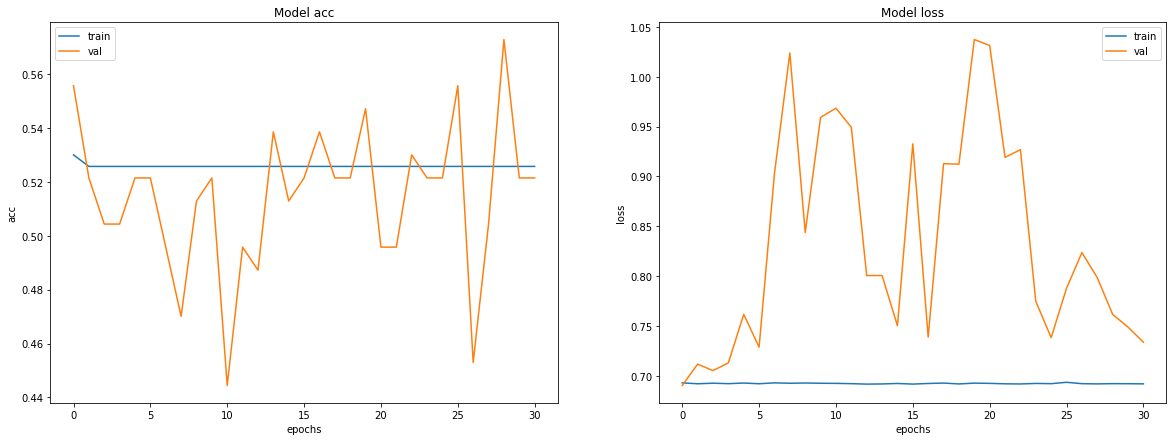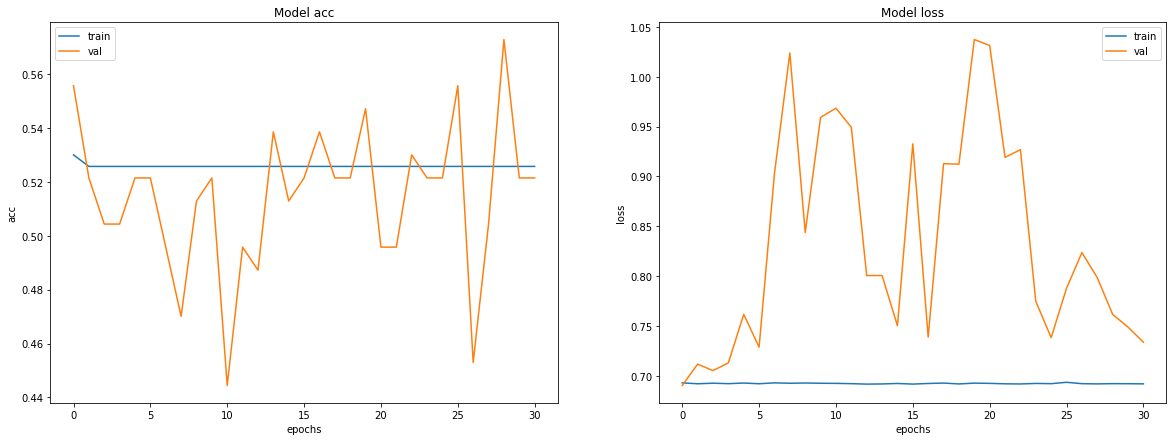

## images from original source:
    https://www.kaggle.com/ammarnassanalhajali/brain-tumor-3d-training/output